# Feature engineering

### 0 Libraries, functions and variables description

#### 0.1 Libraries

In [ ]:
!pip install plotly==5.15.0
!pip3.10 install --upgrade pip
!pip install nbformat
!pip install --upgrade nbformat
! pip install feature-engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 5.5 MB/s eta 0:00:00


In [1]:
# handle dataset
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# To transform variables
from sklearn.preprocessing import (
    FunctionTransformer, PowerTransformer, LabelBinarizer,
    MinMaxScaler, StandardScaler, RobustScaler
)

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import (
    train_test_split, cross_validate, StratifiedKFold, KFold, cross_val_score
)

# to correctly set up the cross-validation
from imblearn.pipeline import make_pipeline

# Feature-engine
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from feature_engine.outliers import Winsorizer
from feature_engine.creation import MathFeatures, RelativeFeatures

# target binarization
from sklearn.preprocessing import label_binarize
from feature_engine.discretisation import ArbitraryDiscretiser

# feature importance and imbalance data
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    precision_recall_fscore_support, roc_auc_score
)

# Imbalance data
# to sample the hyperparameter space based on distributions
from scipy import stats

#Undersampling
from imblearn.under_sampling import (RandomUnderSampler,CondensedNearestNeighbour,
    TomekLinks,OneSidedSelection,EditedNearestNeighbours,RepeatedEditedNearestNeighbours,
    AllKNN,NeighbourhoodCleaningRule,NearMiss,InstanceHardnessThreshold
)

# Oversampling
from imblearn.over_sampling import (
    RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE)

# Over_under sampling
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier



# Special ensemble methods to work with imbalanced data
# We will use those based on boosting, which tend to work better
from imblearn.ensemble import RUSBoostClassifier, EasyEnsembleClassifier

# To put the undersampling methods and the GBM together
from imblearn.pipeline import make_pipeline

# To save the trained scaler class
import joblib

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)



#### 0.2 Functions

In [ ]:
def plot_boxplot_and_hist(data, variable):

    # creating a figure composed of two matplotlib.Axes
    # objects (ax_box and ax_hist)

    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()



#### 0.3 Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# # load dataset
data = pd.read_csv('/content/drive/MyDrive/TFM/data_tfm/nts_data.csv')
data.head()

In [4]:
#load dataset
data = pd.read_csv('/Users/aprilm/data_science/data_tfm/nts_data.csv')
data.head()

,mode_main,distance,density,age,male,ethnicity,education,income,cars,license,bicycles,weekend,diversity,green,temp,precip,wind
0,walk,1.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
1,walk,10.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
2,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
3,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
4,car,61.5,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8


#### 0.3.1 Variable types

In [ ]:
# let's inspect the type of variables
data.dtypes

mode_main     object
distance     float64
density      float64
age            int64
male          object
ethnicity     object
education     object
income        object
cars           int64
license       object
bicycles       int64
weekend       object
diversity    float64
green        float64
temp         float64
precip       float64
wind         float64
dtype: object

In [ ]:
data.shape

(230608, 17)

In [6]:
# make list of variables  types

# numerical: discrete vs continuous
discrete_vars = [var for var in data.columns if data[var].dtype !=
            'O' and var != 'mode_main' and data[var].nunique() < 12]

cont_vars = [var for var in data.columns if data[var].dtype !=
              'O' and var != 'mode_main' and var not in discrete_vars]


# categorical
cat_vars = [var for var in data.columns if data[var].dtype ==
               'O' and var != 'mode_main']

print('There are {} discrete variables'.format(len(discrete_vars)))
print('There are {} continuous variables'.format(len(cont_vars)))
print('There are {} categorical variables'.format(len(cat_vars)))

There are 2 discrete variables
There are 8 continuous variables
There are 6 categorical variables


In [ ]:
cont_vars

['distance', 'density', 'age', 'diversity', 'green', 'temp', 'precip', 'wind']

In [ ]:
cat_vars

['male', 'ethnicity', 'education', 'income', 'license', 'weekend']

#### 0.5 Variable characteristics

In [ ]:
# missing data
data.isnull().sum()

mode_main    0
distance     0
density      0
age          0
male         0
ethnicity    0
education    0
income       0
cars         0
license      0
bicycles     0
weekend      0
diversity    0
green        0
temp         0
precip       0
wind         0
dtype: int64

There are not missing data in our dataset

In [ ]:
# Cardenality
data[cat_vars].nunique()

male         2
ethnicity    3
education    3
income       3
license      2
weekend      2
dtype: int64

There is no highly cardinal

#### 0.4 Split dataset into train and test

In [7]:
#Let's separate into train and test set, and set the seed in 0


X_train, X_test, y_train, y_test = train_test_split(
    data.drop('mode_main', axis=1),  # predictive variables
    data['mode_main'],  # target
    test_size=0.3,
    random_state=0,  # setting the seed to 0 
)


X_train.shape, X_test.shape


((161425, 16), (69183, 16))

##1 Feature Engineering

In the following cells, we will engineer the variables of the trip dataset so that we tackle:
1.   Non-Gaussian distributed variable
2.   Categorical variables convert strings to numbers
3.   Balance the target

#### 1.1 Target

In [8]:
# We want to see the distribution to check the balance of the data
data['mode_main'].value_counts(normalize=True)

car     0.552622
bike    0.244129
walk    0.162921
pt      0.040328
Name: mode_main, dtype: float64

Our target is clearly imbalance being the majority class 'car' and the minority 'pt'.

##### 1.1.1 Target enconding

In [9]:
# Let's enconde the target.
target_cat = {'car': 0, 'bike': 1, 'walk':2, 'pt':3 }

y_train = y_train.map(target_cat)
y_test = y_test.map(target_cat)

### 1.3 Numerical variable transformation

#### 1.3.1 Continuous variable Yeo-Johson transformation

In [10]:
#  PowerTransformer from sklearn
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformer.set_output(transform="pandas")

for var in ['density', 'diversity', 'green', 'temp', 'wind']:
    # Define the new column name
    var_tr = var + '_tr'

    # Fit the transformer on the training data
    transformer.fit(X_train[[var]])

    # Transform the training data
    X_train[var_tr] = transformer.transform(X_train[[var]])

    # Transform the test data using the same transformer
    X_test[var_tr] = transformer.transform(X_test[[var]])


#### 1.3.2 Continuous variable Logarithmic transformation

In [11]:
# Initialize the transformer for logarithmic transformation
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
transformer.set_output(transform="pandas")

for var in ['age', 'distance']:

    # Define the new column name
    var_tr = var + '_tr'
    # Transform the training data
    X_train[var_tr] = transformer.transform(X_train[[var]])

    # Transform the test data
    X_test[var_tr] = transformer.transform(X_test[[var]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


#### 1.3.4 Binarize Skewed variable 'precip'

For the variable 'precip' we would tranform it into binary variable

In [12]:
X_train['precip_bin'] = np.where(X_train['precip'] == 0, 0, 1)
X_test['precip_bin'] = np.where(X_test['precip'] == 0, 0, 1)

### 1.4 Categorical variable transformation

In [ ]:
data[cat_vars].head()

,male,ethnicity,education,income,license,weekend
0,no,native,lower,less20,yes,yes
1,no,native,lower,less20,yes,yes
2,yes,western,middle,20to40,yes,yes
3,yes,western,middle,20to40,yes,yes
4,yes,western,middle,20to40,yes,yes


#### 1.4.1 Variables 'male', 'license' and 'weekend'

In [13]:
# Lets binarize these categories using yes:1 and no:0
two_cat = {'yes': 1, 'no': 0}
two_var = ['male', 'license', 'weekend']

for var in two_var:
  var_bin= var + '_bin'
  X_train[var_bin] = X_train[var].map(two_cat)
  X_test[var_bin] = X_test[var].map(two_cat)

#### 1.4.2 Variable 'income'

In [14]:
# Given 'income's' ordinal nature we are going to use ordinal encoding.
income_cat = {'less20': 0, '20to40': 1, 'more40':2}

X_train['income_ord'] = X_train['income'].map(income_cat)
X_test['income_ord'] = X_test['income'].map(income_cat)

#### 1.4.3 Variable 'ethnicity'

In [15]:
# This variable is highly imbalanced with a dominal category 'native'. To compesate
#the imbalance we are going to group in one column 'wester' and 'nonwester' and them
# binarize the variables

# Grouping less frequent categories for 'ethnicity'
X_train['ethnicity_bin'] = X_train['ethnicity'].replace(['western', 'nonwestern'], 'western_nonwestern')
X_test['ethnicity_bin'] = X_test['ethnicity'].replace(['western', 'nonwestern'], 'western_nonwestern')

In [16]:
# Create a dictionary for native and western_nonwestern
ethnicity_cat = {'native': 0, 'western_nonwestern': 1}
X_train['ethnicity_bin'] = X_train['ethnicity_bin'].map(ethnicity_cat)
X_test['ethnicity_bin'] = X_test['ethnicity_bin'].map(ethnicity_cat)

#### 1.4.4 Variable 'education'

In [17]:
# Let's apply One Hot Encoder with Feature - Engine

# initialize the encoder
encoder = OneHotEncoder(variables=['education'], drop_last=True)
# fit the encoder
encoder.fit(X_train)

# transform the data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [18]:
# Create a copy
X_train_2 = X_train.copy()
X_test_2= X_test.copy()

In [19]:
print(X_test_2.shape, X_train_2.shape, y_train.shape, y_test.shape)

(69183, 30) (161425, 30) (161425,) (69183,)


## 1.5 Baseline

In [20]:
# Exclude the object and the numeric data with transformation to have a raw data
X_train_bl = X_train_2.select_dtypes(exclude=['O']).drop(columns=X_train_2.filter(like='_tr').columns.tolist() +['precip_bin'])
X_test_bl= X_test_2.select_dtypes(exclude=['O']).drop(columns=X_test_2.filter(like='_tr').columns.tolist() + ['precip_bin'])

#### 1.5.1 Model perfomance


In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_bl, y_train)
y_pred_val_rf = rf.predict(X_test_bl)
f1_rf = f1_score(y_test, y_pred_val_rf, average='macro')

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_bl, y_train)
y_pred_val_logreg = logreg.predict(X_test_bl)
f1_logreg = f1_score(y_test, y_pred_val_logreg, average='macro')

print(f1_rf, f1_logreg)


0.7347365887648787 0.48936187987915897


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### 1.5.1.1 Stratified K-Fold Cross-Validation for rf

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Train Random Forest using Stratified K-Fold Cross-Validation
rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Calculate F1 scores across all folds
f1_scores = cross_val_score(rf, X_train_bl, y_train, scoring='f1_macro', cv=skf)

# Print the F1 scores obtained for each fold
print(f"F1 scores for each fold: {f1_scores}")

# Print the average F1 score across all folds
print(f"Average F1 score: {f1_scores.mean()}")

# If you also want to evaluate the model on a separate test set
rf.fit(X_train_bl, y_train)
y_pred_val_rf = rf.predict(X_test_bl)
f1_rf = f1_score(y_test, y_pred_val_rf, average='macro')
print(f"F1 score on test set: {f1_rf}")

F1 scores for each fold: [0.71487521 0.70979957 0.70885054 0.70525011 0.70785044]
Average F1 score: 0.7093251760536617
F1 score on test set: 0.7347365887648787


### 1.5.2 Metrics for each class

Because we are working with imbalance data let's calculate probability vectors for each class.

In [ ]:
# for the baseline we work with the class predictions
y_rf_pred = rf.predict(X_test_bl)

In [ ]:
# Calculation metrics for each class using Random Forest.
p, r, f, s = precision_recall_fscore_support(
    y_test,
    y_rf_pred, #for the random forest
    labels=[0,1,2,3], # the labels for which we want the metrics determined
    average=None, # when None, returns a metric per label
)

print('Precision: ', p)
print('Recall: ', r)
print('f score: ', f)
print('Support: ', s)
print()

Precision:  [0.83703442 0.78023523 0.79128876 0.79596823]
Recall:  [0.92923504 0.72349001 0.66510061 0.46205674]
f score:  [0.88072826 0.75079194 0.72272793 0.58469823]
Support:  [38211 16871 11281  2820]



Precision:  [0.83827907 0.78110086 0.79283456 0.79661017]

Recall:  [0.9285546  0.72757987 0.66696215 0.46666667]

f score:  [0.88111055 0.75339103 0.72447162 0.58855098]

Support:  [38211 16871 11281  2820

We can see clearly that 'car' has the biggest probability

**Random Forest:**

Precision: The model has a high precision for the class labeled 0 but very low precision for the class labeled 1 and no precision for classes 2 and 3.

Recall: The model has almost perfect recall for the class labeled 0 but very low recall for the class labeled 1 and no recall for classes 2 and 3.

F-score: The F-score is high for class 0 due to the high precision and recall, but it's very low for class 1 and zero for classes 2 and 3.

Support: The class labeled 0 has the highest support, indicating it's the most frequent class, which might explain the model's bias towards it.

**Logistic Regression:**

Precision, Recall, and F-score: All these metrics are higher for Logistic Regression across all classes compared to Random Forest. This indicates that Logistic Regression is making more balanced predictions across the classes.

Support: The support remains the same since it's based on the true distribution of y_test.

### 1.5.4 Importance of variables Baseline

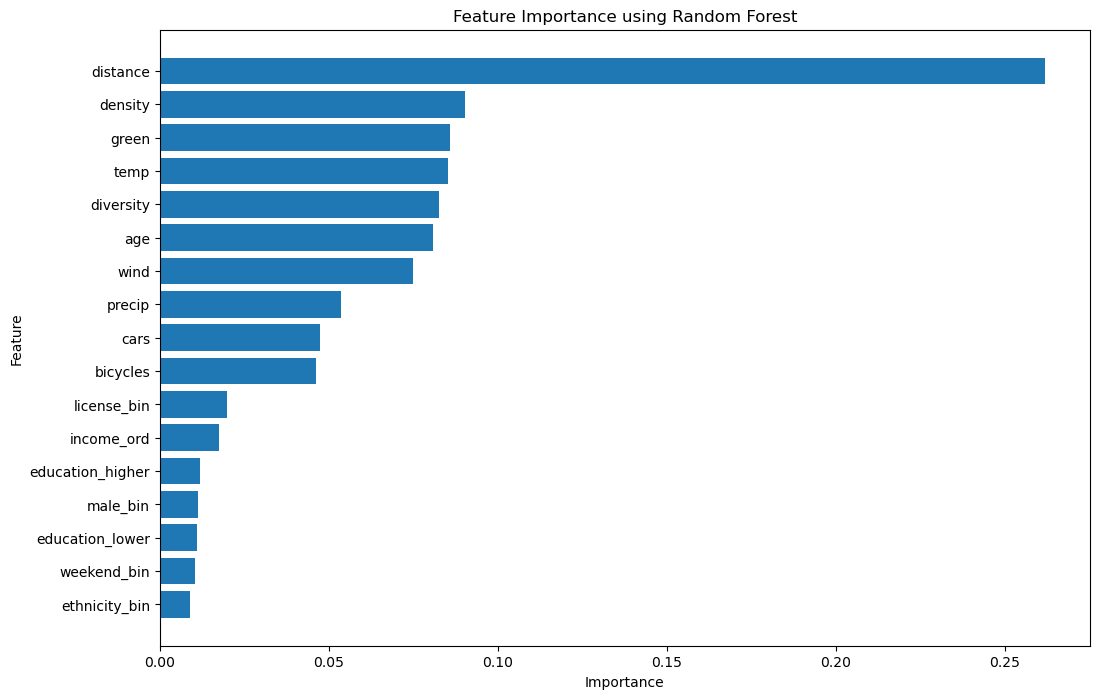

In [21]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_bl , y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_bl.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [22]:
features_df

,Feature,Importance
0,distance,0.262036
1,density,0.090200
6,green,0.085862
7,temp,0.085258
5,diversity,0.082600
2,age,0.080841
9,wind,0.075044
8,precip,0.053478
3,cars,0.047345
4,bicycles,0.046092


## 1.6 Database 2

The database 2 include all the transformation of the variables without any feature creation

In [23]:
X_train_2 = X_train_2.select_dtypes(exclude=['O'])
X_test_2= X_test_2.select_dtypes(exclude=['O'])

In [24]:
print(X_test_2.shape, X_train_2.shape, y_train.shape, y_test.shape)

(69183, 25) (161425, 25) (161425,) (69183,)


In [25]:
X_train_2.head()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind,density_tr,diversity_tr,green_tr,temp_tr,wind_tr,age_tr,distance_tr,precip_bin,male_bin,license_bin,weekend_bin,income_ord,ethnicity_bin,education_higher,education_lower
113879,52.0,0.08722,42,3,3,2.42995,84.982398,22.2,0.0,2.0,0.081716,4.340762,58.732673,20.291031,1.031997,3.737670,3.951244,0,1,1,0,2,0,1,0
108051,105.0,0.78819,58,2,4,1.91326,38.085938,10.6,8.6,7.2,0.496895,3.123957,28.474829,9.921162,1.868745,4.060443,4.653960,1,1,1,0,2,0,1,0
215431,2.6,0.45342,64,1,3,2.27121,80.190088,22.7,4.7,3.8,0.337722,3.951306,55.743501,20.732420,1.435176,4.158883,0.955511,1,0,1,0,1,0,0,1
91920,2.4,1.23705,61,2,2,2.06524,71.122919,21.1,0.0,2.3,0.649514,3.466545,50.035169,19.318639,1.115528,4.110874,0.875469,0,0,1,0,2,0,0,0
55902,1.0,2.76933,58,1,1,1.75506,38.385310,11.3,9.3,9.2,0.939518,2.781178,28.677243,10.555795,2.037925,4.060443,0.000000,1,1,1,0,1,0,0,0


### 1.6.1 Model perfomance

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_2, y_train)
y_pred_val_rf = rf.predict(X_test_2)
f1_rf = f1_score(y_test, y_pred_val_rf, average='macro')

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_2, y_train)
y_pred_val_logreg = logreg.predict(X_test_2)
f1_logreg = f1_score(y_test, y_pred_val_logreg, average='macro')

print(f1_rf, f1_logreg)


0.7223920901593275 0.5256246936102931


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Baseline results:**
0.7383164387591259 0.4889700488105907

**X_train_2 results:**
0.7223920901593275 0.5256246936102931

1.6.1.1 Stratified K-Fold Cross-Validation for rf

### 1.5.2 Metrics for each class

In [ ]:
# for the Database_2 we work with the class predictions
y_rf_pred = rf.predict(X_test_2)

In [ ]:
# Calculation metrics for each class using Random Forest.
p, r, f, s = precision_recall_fscore_support(
    y_test,
    y_rf_pred, #for the random forest
    labels=[0,1,2,3], # the labels for which we want the metrics determined
    average=None, # when None, returns a metric per label
)

print('Precision: ', p)
print('Recall: ', r)
print('f score: ', f)
print('Support: ', s)
print()

Precision:  [0.83205478 0.76864477 0.78186223 0.78180662]
Recall:  [0.92536181 0.71169462 0.65800904 0.4358156 ]
f score:  [0.87623131 0.73907423 0.7146089  0.55965392]
Support:  [38211 16871 11281  2820]



### 1.5.3 Importance of variables of Database 2


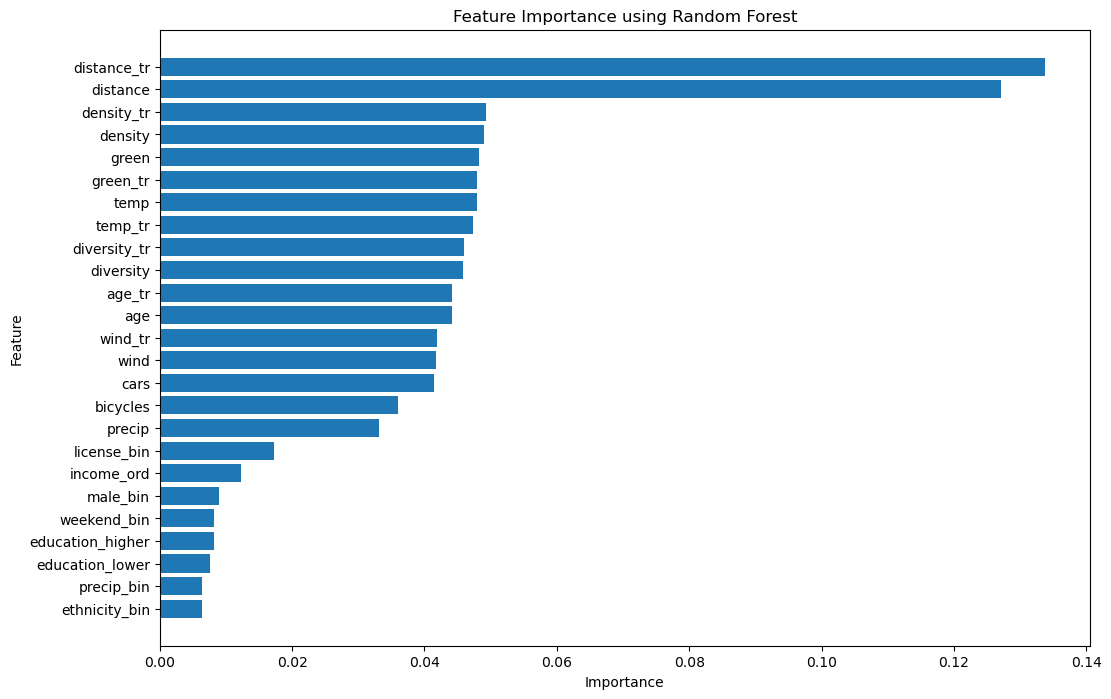

In [26]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_2 , y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_2.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [27]:
features_df

,Feature,Importance
16,distance_tr,0.133843
0,distance,0.127102
10,density_tr,0.049352
1,density,0.048984
6,green,0.048290
12,green_tr,0.047906
7,temp,0.047864
13,temp_tr,0.047357
11,diversity_tr,0.045992
5,diversity,0.045852


## 1.6 Database 2a

In [ ]:
X_train_2a = X_train_2.copy()
X_test_2a = X_test_2.copy()

As we can see 'distance' is the most important variable. Let's treat the outliers.

#### 1.6.1 Distance

In [ ]:
X_train_2a['distance'].describe()

count    161425.000000
mean         12.249906
std          23.730498
min           0.100000
25%           1.500000
50%           4.000000
75%          12.000000
max         400.000000
Name: distance, dtype: float64

In [ ]:
# Create a copy of the 'distance' column named 'distance_wins'
X_train_2a['distance_wins'] = X_train_2a['distance']
X_test_2a['distance_wins'] = X_test_2a['distance']

# Initialize the Winsorizer
capper = Winsorizer(
    variables=['distance_wins'],  # Apply the transformation to 'distance_wins'
    capping_method='quantiles',
    tail='both',
    fold=0.05,
)

# Fit the Winsorizer on the training data
capper.fit(X_train_2a)

# Transform the training and test data
X_train_2a = capper.transform(X_train_2a)
X_test_2a = capper.transform(X_test_2a)


In [ ]:
X_train_2a= capper.transform(X_train_2a)
X_test_2a= capper.transform(X_test_2a)

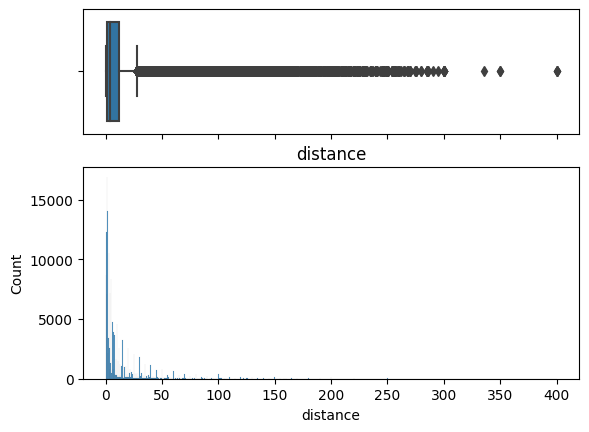

In [ ]:
# before capping
plot_boxplot_and_hist(X_train, 'distance')

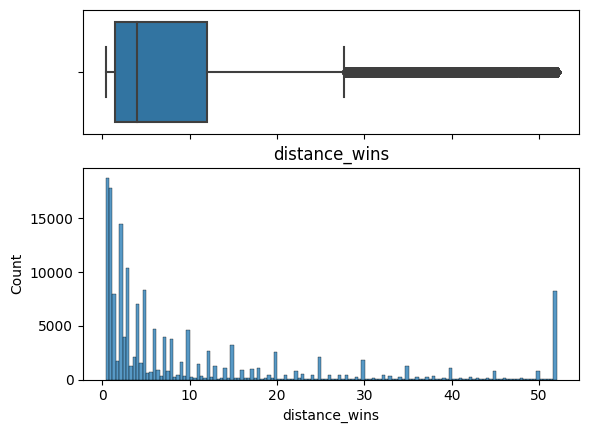

In [ ]:
# after capping
plot_boxplot_and_hist(X_train_2a, 'distance_wins')

#### 1.6.2 Aribitrary discretization 'age', 'temp', 'distance', 'wind', 'diversity', 'green', 'density', 'precip', 'bicycles', 'cars'

In [ ]:
# Binning dictionary
binning_dict = {
    'age': [18, 36, 60, 100],
        'temp': [-12, 5, 15, 45],
        'distance': [0, 5, 10, 20, 40, 60, 80, 100, 500],
        'wind':[0,2.70,3.80,5.10,20],
        'diversity': [0, 1.4, 1.8, 2.2, 2.8, 4],
        'green': [0, 37, 54, 74, 100],
        'density': [0, 0.59, 1.15, 1.95, 5, 15],
        'precip':[0,0.10,2.3,10,142.3],
    'cars':[0, 1, 2, 3, 20],
    'bicycles':[0, 3, 5, 7, 20]
}

# Instantiate the discretiser
disc = ArbitraryDiscretiser(binning_dict=binning_dict)

# Fit and transform the training data
X_train_binned = disc.fit_transform(X_train_2a)

# Transform the test data
X_test_binned = disc.transform(X_test_2a)

# Select only the transformed columns and rename them
X_train_binned = X_train_binned[binning_dict.keys()]
X_train_binned.columns = [col + '_arb_disc' for col in X_train_binned.columns]

X_test_binned = X_test_binned[binning_dict.keys()]
X_test_binned.columns = [col + '_arb_disc' for col in X_test_binned.columns]

# Concatenate the original training data with the binned training data
X_train_2a = pd.concat([X_train_2a, X_train_binned], axis=1)

# Concatenate the original test data with the binned test data
X_test_2a = pd.concat([X_test_2a, X_test_binned], axis=1)


In [ ]:
X_test_2a.head()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind,density_tr,diversity_tr,green_tr,temp_tr,wind_tr,age_tr,distance_tr,precip_bin,male_bin,license_bin,weekend_bin,income_ord,ethnicity_bin,education_higher,education_lower,distance_wins,age_arb_disc,temp_arb_disc,distance_arb_disc,wind_arb_disc,diversity_arb_disc,green_arb_disc,density_arb_disc,precip_arb_disc,cars_arb_disc,bicycles_arb_disc
107969,60.0,0.60292,59,2,2,1.657640,86.718723,9.0,12.6,9.7,0.415185,2.577198,59.811263,8.464714,2.074456,4.077537,4.094345,1,0,1,0,2,0,0,0,52.0,1,1,4,3,1,3,1,3,1,0
140225,24.0,0.33218,67,1,2,1.318890,83.783784,22.2,0.0,1.7,0.265184,1.910888,57.986750,20.291031,0.938585,4.204693,3.178054,0,0,1,0,1,0,1,0,24.0,2,2,3,0,0,3,0,0,0,0
721,21.7,1.69205,35,2,4,1.185120,80.843128,2.2,1.3,5.1,0.762142,1.666519,56.151914,2.140838,1.632528,3.555348,3.077312,1,0,1,1,1,1,0,1,21.7,0,0,3,2,0,3,2,1,1,1
143738,18.0,0.43820,63,2,6,1.970660,70.759611,4.8,15.7,5.3,0.329140,3.251826,49.804906,4.592231,1.658679,4.143135,2.890372,1,1,1,0,2,0,0,0,18.0,2,0,2,3,2,2,0,3,1,2
184635,1.0,3.62231,75,0,1,0.943884,18.283963,-1.2,0.0,7.5,1.031980,1.253403,14.624294,-1.221363,1.896890,4.317488,0.000000,0,0,0,0,1,0,0,1,1.0,2,0,0,3,0,0,3,0,0,0


In [ ]:
#We decided to discretize the temp by seson to simplify the data, and to captures cyclical patterns, if there are, in the future
def assign_season(temp):
    if -9 <= temp <= 5:
        return 'winter'
    elif 6 <= temp <= 15:
        return 'spring_autum'  # This will also cover Autumn
    else:
        return 'summer'

# Apply the function to the temperature column in X_train and X_test
X_train_2a['season'] = X_train_2a['temp'].apply(assign_season)
X_test_2a['season'] = X_test_2a['temp'].apply(assign_season)


In [ ]:
# Let's apply One Hot Encoder with Feature - Engine

# initialize the encoder
encoder = OneHotEncoder(variables=['season'], drop_last=True)
# fit the encoder
encoder.fit(X_train_2a)

# transform the data
X_train_2a = encoder.transform(X_train_2a)
X_test_2a = encoder.transform(X_test_2a)


### 1.6.2 Model perfomance Database 2a

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_2a, y_train)
y_pred_val_rf = rf.predict(X_test_2a)
f1_rf = f1_score(y_test, y_pred_val_rf, average='macro')

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_2a, y_train)
y_pred_val_logreg = logreg.predict(X_test_2a)
f1_logreg = f1_score(y_test, y_pred_val_logreg, average='macro')

print(f1_rf, f1_logreg)


0.7192050058444955 0.5363817566773804


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Baseline results:**
0.7383164387591259 0.4889700488105907

**X_train_2 results:**
0.7129843972710191 0.5375174022693144

**X_train_2a results:**
0.7192050058444955 0.5363817566773804

### 1.6.3Metric for each class

In [ ]:
# for the Database_2 we work with the class predictions
y_rf_pred = rf.predict(X_test_2a)

In [ ]:
# Calculation metrics for each class using Random Forest.
p, r, f, s = precision_recall_fscore_support(
    y_test,
    y_rf_pred, #for the random forest
    labels=[0,1,2,3], # the labels for which we want the metrics determined
    average=None, # when None, returns a metric per label
)

print('Precision: ', p)
print('Recall: ', r)
print('f score: ', f)
print('Support: ', s)
print()

Precision:  [0.832469   0.76484818 0.77810588 0.77261146]
Recall:  [0.92421031 0.71216881 0.65402003 0.43014184]
f score:  [0.87594409 0.73756906 0.71068728 0.55261959]
Support:  [38211 16871 11281  2820]



### 1.6.4 Importance of variables of Database 2a

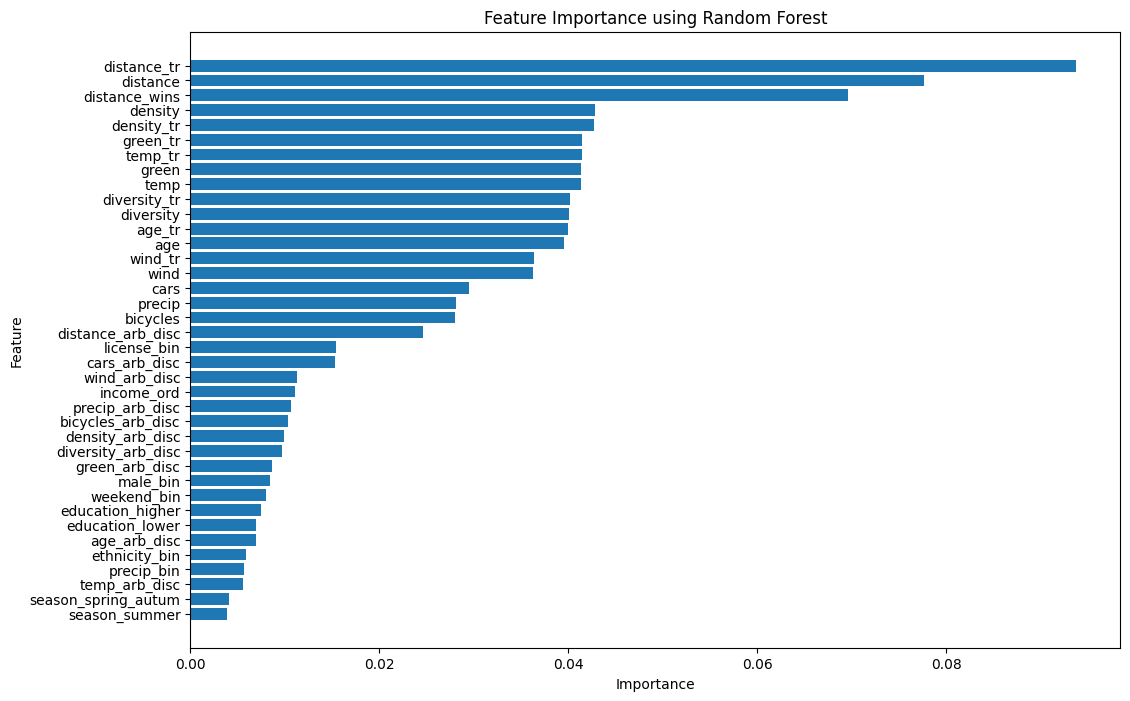

In [ ]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_2a , y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_2a.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

Adding numerical transformations, binning and discretizing seem improve the Logistic Regresion from the Baseline, but decrease the perfomance of the Random forest model.

In [ ]:
features_df

,Feature,Importance
16,distance_tr,0.093715
0,distance,0.077623
25,distance_wins,0.069549
1,density,0.042861
10,density_tr,0.042686
12,green_tr,0.041491
13,temp_tr,0.041396
6,green,0.041379
7,temp,0.041331
11,diversity_tr,0.040148


## 1.7 Feature creation Database 3


Let's analyse the nature of all the variables to understand the potential intareactions.

- Distance: This is a key variable and can interact with many other variables to provide insights into travel behavior.
- Density: Represents the density of the environment. Interactions with distance, age, and cars can be insightful.
- Age: Age can influence travel behavior. Interactions with distance, cars, and bicycles might be relevant.
- Male, Ethnicity, Income: Demographic variables can have interactions with travel-related variables like distance, cars, and bicycles.
- Cars, License, Bicycles: These represent means of transportation. Interactions among these and with distance can be insightful.
- Weekend: Indicates if the travel was on a weekend. Can interact with distance and other travel-related variables.
- Diversity, Green: Environmental variables. Interactions with distance can provide insights into travel behavior in different environments.
- Temp, Precip, Wind: Weather conditions. Can influence travel behavior. Interactions with distance and mode of transportation can be insightful.
- Seasons:  Seasons can significantly influence travel behavior due to weather conditions, daylight hours, and cultural or societal norms.

In [ ]:
# Create a new copy for the feature creation
X_train_3 = X_train_2a.copy()
X_test_3 = X_test_2a.copy()

In [ ]:
print(X_train_3.shape, X_test_3.shape)

(161425, 38) (69183, 38)


In [ ]:
#Fist we are going to create combinations of distance_tr with other variables using feature engineering
# features of interest
features = ['distance','density']

# reference features
reference = ['green', 'temp', 'diversity','age', 'wind', 'cars','precip',	'distance_tr', 'density_tr', 'green_tr', 'temp_tr','age_tr', 'wind_tr'	]

In [ ]:
creator = RelativeFeatures(
    variables=features,
    reference=reference,
    func=["mul"]
)

In [ ]:
X_train_3 = creator.fit_transform(X_train_3)
X_test_3= creator.fit_transform(X_test_3)

In [ ]:
X_test_3.head()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind,density_tr,diversity_tr,green_tr,temp_tr,wind_tr,age_tr,distance_tr,precip_bin,male_bin,license_bin,weekend_bin,income_ord,ethnicity_bin,education_higher,education_lower,distance_wins,age_arb_disc,temp_arb_disc,distance_arb_disc,wind_arb_disc,diversity_arb_disc,green_arb_disc,density_arb_disc,precip_arb_disc,cars_arb_disc,bicycles_arb_disc,season_summer,season_spring_autum,distance_mul_green,density_mul_green,distance_mul_temp,density_mul_temp,distance_mul_diversity,density_mul_diversity,distance_mul_age,density_mul_age,distance_mul_wind,density_mul_wind,distance_mul_cars,density_mul_cars,distance_mul_precip,density_mul_precip,distance_mul_distance_tr,density_mul_distance_tr,distance_mul_density_tr,density_mul_density_tr,distance_mul_green_tr,density_mul_green_tr,distance_mul_temp_tr,density_mul_temp_tr,distance_mul_age_tr,density_mul_age_tr,distance_mul_wind_tr,density_mul_wind_tr
107969,60.0,0.60292,59,2,2,1.657640,86.718723,9.0,12.6,9.7,0.415185,2.577198,59.811263,8.464714,2.074456,4.077537,4.094345,1,0,1,0,2,0,0,0,52.0,1,1,4,3,1,3,1,3,1,0,0,1,5203.123409,52.284453,540.00,5.426280,99.458400,0.999424,3540.0,35.57228,582.00,5.848324,120.0,1.20584,756.00,7.596792,245.660674,2.468562,24.911102,0.250323,3588.675751,36.061406,507.882847,5.103545,244.652247,2.458429,124.467375,1.250731
140225,24.0,0.33218,67,1,2,1.318890,83.783784,22.2,0.0,1.7,0.265184,1.910888,57.986750,20.291031,0.938585,4.204693,3.178054,0,0,1,0,1,0,1,0,24.0,2,2,3,0,0,3,0,0,0,0,1,0,2010.810811,27.831297,532.80,7.374396,31.653360,0.438109,1608.0,22.25606,40.80,0.564706,24.0,0.33218,0.00,0.000000,76.273292,1.055686,6.364415,0.088089,1391.681998,19.262039,486.984745,6.740275,100.912623,1.396715,22.526038,0.311779
721,21.7,1.69205,35,2,4,1.185120,80.843128,2.2,1.3,5.1,0.762142,1.666519,56.151914,2.140838,1.632528,3.555348,3.077312,1,0,1,1,1,1,0,1,21.7,0,0,3,2,0,3,2,1,1,1,0,0,1754.295886,136.790615,47.74,3.722510,25.717104,2.005282,759.5,59.22175,110.67,8.629455,43.4,3.38410,28.21,2.199665,66.777676,5.206966,16.538479,1.289582,1218.496541,95.011847,46.456190,3.622405,77.151053,6.015827,35.425850,2.762318
143738,18.0,0.43820,63,2,6,1.970660,70.759611,4.8,15.7,5.3,0.329140,3.251826,49.804906,4.592231,1.658679,4.143135,2.890372,1,1,1,0,2,0,0,0,18.0,2,0,2,3,2,2,0,3,1,2,0,0,1273.672994,31.006861,86.40,2.103360,35.471880,0.863543,1134.0,27.60660,95.40,2.322460,36.0,0.87640,282.60,6.879740,52.026692,1.266561,5.924516,0.144229,896.488310,21.824510,82.660159,2.012316,74.576425,1.815522,29.856216,0.726833
184635,1.0,3.62231,75,0,1,0.943884,18.283963,-1.2,0.0,7.5,1.031980,1.253403,14.624294,-1.221363,1.896890,4.317488,0.000000,0,0,0,0,1,0,0,1,1.0,2,0,0,3,0,0,3,0,0,0,0,0,18.283963,66.230183,-1.20,-4.346772,0.943884,3.419040,75.0,271.67325,7.50,27.167325,0.0,0.00000,0.00,0.000000,0.000000,0.000000,1.031980,3.738150,14.624294,52.973726,-1.221363,-4.424155,4.317488,15.639280,1.896890,6.871125


- distance_density: This represents how far someone might need to travel in relation to the density of their environment. It could be indicative of how urban or rural an area is. In denser areas, distances to amenities might be shorter, but in less dense areas, one might need to travel further

Distance/Density: How urban or rural an area is.
Distance*density represents the relationship between the distance someone might need to travel and the density of their environment.
Distance*Age: Older individuals might travel differently than younger ones.
Distance*Male: Gender-based travel behavior.
Distance*Income: Income might influence the distance and mode of travel.
Distance*Temp: As discussed, the willingness to travel based on weather conditions.
Distance*Weekend: People might travel differently on weekends.
Distance*Green: Indicates travel behavior in greener areas.
Distance*Wind: Wind might influence the mode of transportation, especially bicycles.
Cars*Bicycles: Indicates if individuals who have cars also use bicycles.
Temp*Wind: Combined weather conditions.

In [ ]:
#Fist we are going to create are combinations of distance_tr with other variables using feature engineering
# features of interest
features = ['distance']

# reference features
reference = ['density']

In [ ]:
creator = RelativeFeatures(
    variables=features,
    reference=reference,
    func=['div', 'mul'],
)

In [ ]:
X_train_3 = creator.fit_transform(X_train_3)
X_test_3= creator.fit_transform(X_test_3)

### 1.7.2  Model perfomance X_train_3

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_3, y_train)
y_pred_val_rf = rf.predict(X_test_3)
f1_rf = f1_score(y_test, y_pred_val_rf, average='macro')

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=0)
logreg.fit(X_train_3, y_train)
y_pred_val_logreg = logreg.predict(X_test_3)
f1_logreg = f1_score(y_test, y_pred_val_logreg, average='macro')

print(f1_rf, f1_logreg)

0.6785559991775763 [0 0 0 ... 0 0 0]


**Baseline results:**
0.7383164387591259 0.4889700488105907

**X_train_2 results:**
0.7129843972710191 0.5375174022693144

**X_train_2a results:**
0.7192050058444955 0.5363817566773804

**X_train_3 results:**
0.6785559991775763 0.4933606989021863

### 1.7.3 Metrics for each class

In [ ]:
rf.fit(X_train_3.values, y_train)
y_pred_val_rf = rf.predict(X_test_3.values)


In [ ]:
# Calculation metrics for each class using Random Forest.
p, r, f, s = precision_recall_fscore_support(
    y_test,
    y_rf_pred, #for the random forest
    labels=[0,1,2,3], # the labels for which we want the metrics determined
    average=None, # when None, returns a metric per label
)

print('Precision: ', p)
print('Recall: ', r)
print('f score: ', f)
print('Support: ', s)
print()

Precision:  [0.832469   0.76484818 0.77810588 0.77261146]
Recall:  [0.92421031 0.71216881 0.65402003 0.43014184]
f score:  [0.87594409 0.73756906 0.71068728 0.55261959]
Support:  [38211 16871 11281  2820]



Although Database 3 has the worst f1 result it seems that

### 1.7.4 Importance of variables of Database 3





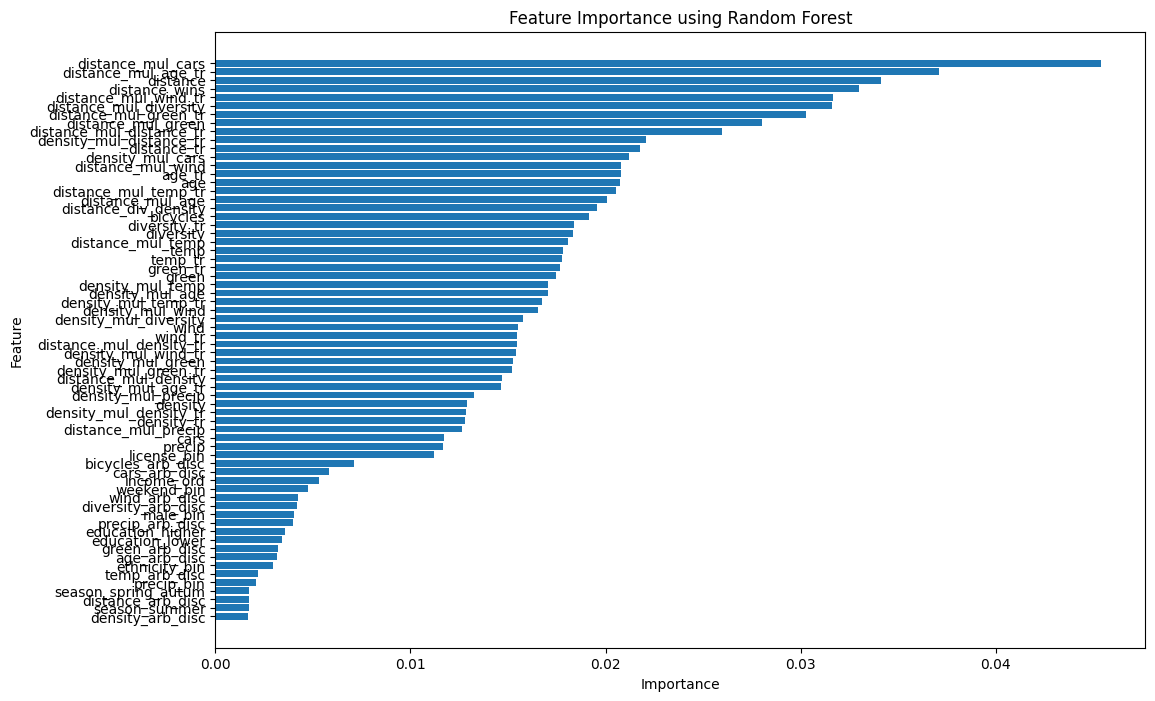

In [ ]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_3 , y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_train_3.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [ ]:
features_df

,Feature,Importance
48,distance_mul_cars,0.045403
60,distance_mul_age_tr,0.037082
0,distance,0.034124
25,distance_wins,0.032976
62,distance_mul_wind_tr,0.031634
...,...,...
17,precip_bin,0.002074
37,season_spring_autum,0.001737
28,distance_arb_disc,0.001721
36,season_summer,0.001700


The model that exhibits the best performance is the baseline. It appears that as we introduce more features, performance diminishes. However, given that the baseline is such a simplistic model, there's a potential risk of overfitting the training set. Therefore, we will proceed with variable selection to achieve a more realistic performance assessment. One clear conclusion we can draw is that the data responds much more favorably to the RandomForestClassifier compared to the Logistic Regression.

## 1.8 Feature scaling

As we aim to evaluate the optimal performance with class balance, and considering that some models require scaled data, we will employ the "max and min scaler" for data scaling. However, for the remainder of our work, we will utilize unscaled data. Additionally, we will no longer be using Logistic Regression moving forward.

In [ ]:
# set up the scaler
scaler = MinMaxScaler().set_output(transform="pandas")

In [ ]:
# Now just we are going to scale the dataset with best perfomance (baseline)
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_bl)

# transform train and test sets
X_train_scaled_bl = scaler.transform(X_train_bl)
X_test_scaled_bl = scaler.transform(X_test_bl)

## 1.9 Class Imbalance - Methods evaluation

We are going to create a data to try different methods and evaluate their performace. The data that we are going to use is the original one, scaled.

In [ ]:
# Selecting only the original features

X_train_original = X_train_scaled_bl
X_test_original = X_test_scaled_bl


#### 1.9.2 Under-sampling method

In [ ]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),


    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=4),

    'oss': OneSidedSelection(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=1,
        n_jobs=4),

    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),

    'renn': RepeatedEditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        max_iter=100),

    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=5,
        kind_sel='all',
        n_jobs=4),

    'ncr': NeighbourhoodCleaningRule(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4,
        threshold_cleaning=0.5),

    'nm1': NearMiss(
        sampling_strategy='auto',
        version=1,
        n_neighbors=3,
        n_jobs=4),

    'nm2': NearMiss(
        sampling_strategy='auto',
        version=2,
        n_neighbors=3,
        n_jobs=4),

    'iht': InstanceHardnessThreshold(
        estimator=RandomForestClassifier(
            n_estimators=100, random_state=39, max_depth=3, n_jobs=4,
        ),
        sampling_strategy='auto',
        random_state=0,
        n_jobs=4,
        cv=3)
}

In [ ]:
def run_randomForests(X_train, X_test, y_train, y_test, n_estimators=50):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=39, max_depth=3, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred_train = rf.predict(X_train)
    train_f1_macro = f1_score(y_train, pred_train, average='macro')
    print('Random Forests F1 Macro for Train set:', train_f1_macro)

    print('Test set')
    pred_test = rf.predict(X_test)
    test_f1_macro = f1_score(y_test, pred_test, average='macro')
    print('Random Forests F1 Macro for Test set:', test_f1_macro)

    return {'Train set': train_f1_macro, 'Test set': test_f1_macro}


# Dictionary to save the results
results_dict = {}
shapes_dict = {}

# Subset of the data for faster computation (30% of the data)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_original, y_train, test_size=0.7, random_state=42, stratify=y_train)

# Train a model on the subset of data without under-sampling and determine model performance
f1 = run_randomForests(X_train_sample, X_test_original, y_train_sample, y_test)

# Store results
results_dict['full_data'] = f1
shapes_dict['full_data'] = len(X_train_sample)

best_f1_macro= 0  # Initialize the best ROC-AUC score
best_model = None  # Initialize the best model (resampling method)

# Test the different under-samplers
for undersampler in undersampler_dict.keys():
    print(undersampler)

    # Resample the train set only
    X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train_sample, y_train_sample)

    # Train model and evaluate performance
    f1 = run_randomForests(X_resampled, X_test_original, y_resampled, y_test)

    # Update best model if current ROC-AUC is higher than previous best
    if f1['Test set'] > best_f1_macro:
        best_roc_auc = f1['Test set']
        best_model = undersampler

    # Store results
    results_dict[undersampler] = f1
    shapes_dict[undersampler] = len(X_resampled)
    print()

print("Results:", results_dict)
print("Sample Sizes:", shapes_dict)
print("Best Model:", best_model)
print("Best Test F1_macro:", best_f1_macro)


Train set
Random Forests F1 Macro for Train set: 0.2946943367400376
Test set
Random Forests F1 Macro for Test set: 0.2923226393783613
random
Train set
Random Forests F1 Macro for Train set: 0.5935095206997416
Test set
Random Forests F1 Macro for Test set: 0.4734329316004346

tomek
Train set
Random Forests F1 Macro for Train set: 0.29861335639998626
Test set
Random Forests F1 Macro for Test set: 0.2817261807982229

oss
Train set
Random Forests F1 Macro for Train set: 0.30087927860235886
Test set
Random Forests F1 Macro for Test set: 0.28455166752367833

enn
Train set
Random Forests F1 Macro for Train set: 0.42276215520500254
Test set
Random Forests F1 Macro for Test set: 0.3114398717221186

renn
Train set
Random Forests F1 Macro for Train set: 0.42276215520500254
Test set
Random Forests F1 Macro for Test set: 0.3114398717221186

allknn
Train set
Random Forests F1 Macro for Train set: 0.39292632134920846
Test set
Random Forests F1 Macro for Test set: 0.31306427894261546

ncr
Train set
Ra

Based on the F1 Macro scores for the test set, the model with the Random oversampling technique has the highest score of 0.4734. However, the IHT and NM1 models also have relatively high scores of 0.4094 and 0.4028, respectively.

While the IHT model has the highest training score, it's essential to be cautious about models that perform significantly better on the training set than on the test set, as this could be an indication of overfitting.

In conclusion, based on the provided results, **the Random oversampling model seems to be the best** in terms of F1 Macro score on the test set

#### 1.9.3 Over-sampling method

In [ ]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),

    'smote': SMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        n_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'border2': BorderlineSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',  # samples only the minority class
        random_state=0,  # for reproducibility
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),
}

In [ ]:

# Dictionary to save the results
results_dict = {}
shapes_dict = {}

# Subset of the data for faster computation (30% of the data)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_original, y_train, test_size=0.7, random_state=42, stratify=y_train)

# Train a model on the subset of data without under-sampling and determine model performance
f1 = run_randomForests(X_train_sample, X_test_original, y_train_sample, y_test)

# Store results
results_dict['full_data'] = f1
shapes_dict['full_data'] = len(X_train_sample)

best_f1_macro= 0  # Initialize the best ROC-AUC score
best_model = None  # Initialize the best model (resampling method)

# Test the different oversampler
for oversampler in oversampler_dict.keys():
    print(oversampler)

    # Resample the train set only
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train_sample, y_train_sample)

    # Train model and evaluate performance
    f1 = run_randomForests(X_resampled, X_test_original, y_resampled, y_test)

    # Update best model if current ROC-AUC is higher than previous best
    if f1['Test set'] > best_f1_macro:
        best_roc_auc = f1['Test set']
        best_model = oversampler

    # Store results
    results_dict[oversampler] = f1
    shapes_dict[oversampler] = len(X_resampled)
    print()

print("Results:", results_dict)
print("Sample Sizes:", shapes_dict)
print("Best Model:", best_model)
print("Best Test F1_macro:", best_f1_macro)


Train set
Random Forests F1 Macro for Train set: 0.2946943367400376
Test set
Random Forests F1 Macro for Test set: 0.2923226393783613
random
Train set
Random Forests F1 Macro for Train set: 0.5855804858347146
Test set
Random Forests F1 Macro for Test set: 0.4747019180260379

smote


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.6237134975292916
Test set
Random Forests F1 Macro for Test set: 0.4751136693810226

adasyn


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.5970448496528792
Test set
Random Forests F1 Macro for Test set: 0.44841357251376057

border1


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.6273394702442276
Test set
Random Forests F1 Macro for Test set: 0.490545923872033

border2


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.5908484144923347
Test set
Random Forests F1 Macro for Test set: 0.48168039923343364

svm


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.6391255693773008
Test set
Random Forests F1 Macro for Test set: 0.4951653286951297

Results: {'full_data': {'Train set': 0.2946943367400376, 'Test set': 0.2923226393783613}, 'random': {'Train set': 0.5855804858347146, 'Test set': 0.4747019180260379}, 'smote': {'Train set': 0.6237134975292916, 'Test set': 0.4751136693810226}, 'adasyn': {'Train set': 0.5970448496528792, 'Test set': 0.44841357251376057}, 'border1': {'Train set': 0.6273394702442276, 'Test set': 0.490545923872033}, 'border2': {'Train set': 0.5908484144923347, 'Test set': 0.48168039923343364}, 'svm': {'Train set': 0.6391255693773008, 'Test set': 0.4951653286951297}}
Sample Sizes: {'full_data': 48427, 'random': 107072, 'smote': 107072, 'adasyn': 108044, 'border1': 107072, 'border2': 107072, 'svm': 107072}
Best Model: svm
Best Test F1_macro: 0


The SVM oversampling technique has the highest test F1 Macro score of 0.4952, followed closely by Border1 with a score of 0.4905.

The difference between the training and test scores for each model indicates the degree of overfitting. For instance, the SVM model has a difference of 0.144 between its training and test scores, suggesting some overfitting. However, this difference is not as pronounced as in some other models.

The Full Data model has almost identical training and test scores, indicating that it's not overfitting. However, its performance is significantly lower than the oversampled models.

In conclusion, based on the F1 Macro scores, **the SVM oversampling model seems to be the best in terms of performance on the test set**. However, it's essential to be cautious about models that perform significantly better on the training set than on the test set, as this could be an indication of overfitting. The Border1 model also performs well and has a smaller gap between its training and test scores, making it a strong contender.



### 1.9.4 Over_under sampling

In [ ]:
oversampler_dict = {

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),

    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=4),

    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=4),

}

In [ ]:
# Dictionary to save the results
results_dict = {}
shapes_dict = {}

# Subset of the data for faster computation (30% of the data)
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_original, y_train, test_size=0.7, random_state=42, stratify=y_train)

# Train a model on the subset of data without under-sampling and determine model performance
f1 = run_randomForests(X_train_sample, X_test_original, y_train_sample, y_test)

# Store results
results_dict['full_data'] = f1
shapes_dict['full_data'] = len(X_train_sample)

best_f1_macro= 0  # Initialize the best ROC-AUC score
best_model = None  # Initialize the best model (resampling method)

# Test the different oversampler
for oversampler in oversampler_dict.keys():
    print(oversampler)

    # Resample the train set only
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train_sample, y_train_sample)

    # Train model and evaluate performance
    f1 = run_randomForests(X_resampled, X_test_original, y_resampled, y_test)

    # Update best model if current ROC-AUC is higher than previous best
    if f1['Test set'] > best_f1_macro:
        best_roc_auc = f1['Test set']
        best_model = oversampler

    # Store results
    results_dict[oversampler] = f1
    shapes_dict[oversampler] = len(X_resampled)
    print()

print("Results:", results_dict)
print("Sample Sizes:", shapes_dict)
print("Best Model:", best_model)
print("Best Test F1_macro:", best_f1_macro)

Train set
Random Forests F1 Macro for Train set: 0.2946943367400376
Test set
Random Forests F1 Macro for Test set: 0.2923226393783613
smote


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.6237134975292916
Test set
Random Forests F1 Macro for Test set: 0.4751136693810226

border1


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.6273394702442276
Test set
Random Forests F1 Macro for Test set: 0.490545923872033

svm


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests F1 Macro for Train set: 0.6391255693773008
Test set
Random Forests F1 Macro for Test set: 0.4951653286951297

smenn
Train set
Random Forests F1 Macro for Train set: 0.5359640181170381
Test set
Random Forests F1 Macro for Test set: 0.39940884694110895

smtomek
Train set
Random Forests F1 Macro for Train set: 0.6062054459379791
Test set
Random Forests F1 Macro for Test set: 0.44171500764236793

Results: {'full_data': {'Train set': 0.2946943367400376, 'Test set': 0.2923226393783613}, 'smote': {'Train set': 0.6237134975292916, 'Test set': 0.4751136693810226}, 'border1': {'Train set': 0.6273394702442276, 'Test set': 0.490545923872033}, 'svm': {'Train set': 0.6391255693773008, 'Test set': 0.4951653286951297}, 'smenn': {'Train set': 0.5359640181170381, 'Test set': 0.39940884694110895}, 'smtomek': {'Train set': 0.6062054459379791, 'Test set': 0.44171500764236793}}
Sample Sizes: {'full_data': 48427, 'smote': 107072, 'border1': 107072, 'svm': 107072, 'smenn': 87296, 'smt

The SVM oversampling technique has the highest test **F1 Macro score of 0.4952**, followed closely by **Border1 with a score of 0.4905.**

The difference between the training and test scores for each model indicates the degree of overfitting. For instance, the SVM model has a difference of 0.144 between its training and test scores, suggesting some overfitting. However, this difference is not as pronounced as in some other models.

The Full Data model has almost identical training and test scores, indicating that it's not overfitting. However, its performance is significantly lower than the oversampled models.

In conclusion, based on the F1 Macro scores, the SVM oversampling model seems to be the best in terms of performance on the test set. However, it's essential to be cautious about models that perform significantly better on the training set than on the test set, as this could be an indication of overfitting. **The Border1 model also performs well and has a smaller gap between its training and test scores,** making it a strong contender.

## 1.10 Data balancing


The goal is selecting a model with a smaller gap between training and test scores (to avoid overfitting), and have the best perfomance.

**Random and SMENN **have similar differences between their training and test scores, and both are among the models with the smallest gaps. Additionally, their absolute test performance is reasonably good.

**We are going with SMENN.**

In [ ]:
print('Before undersampling, count of labels 0:', sum(y_train==0))
print('Before undersampling, count of labels 1:', sum(y_train==1))
print('Before undersampling, count of labels 2:', sum(y_train==2))
print('Before undersampling, count of labels 3:\n', sum(y_train==3))
smenn = SMOTEENN(sampling_strategy='auto',random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all'),n_jobs=4)

X_train_bl_sc, y_train_bl_sc = smenn.fit_resample(X_train_bl, y_train)

print('After undersampling, count of labels 0:', sum(y_train_bl_sc==0))
print('After undersampling, count of labels 1:', sum(y_train_bl_sc==1))
print('After undersampling, count of labels 2:', sum(y_train_bl_sc==2))
print('After undersampling, count of labels 3:', sum(y_train_bl_sc==3))


Before undersampling, count of labels 0: 89228
Before undersampling, count of labels 1: 39427
Before undersampling, count of labels 2: 26290
Before undersampling, count of labels 3:
 6480
After undersampling, count of labels 0: 89228
After undersampling, count of labels 1: 68931
After undersampling, count of labels 2: 73754
After undersampling, count of labels 3: 87966


In [ ]:
print('Before undersampling, count of labels 0:', sum(y_train==0))
print('Before undersampling, count of labels 1:', sum(y_train==1))
print('Before undersampling, count of labels 2:', sum(y_train==2))
print('Before undersampling, count of labels 3:\n', sum(y_train==3))


X_train_2_sc, y_train_2_sc = smenn.fit_resample(X_train_2, y_train)

print('After undersampling, count of labels 0:', sum(y_train_2_sc ==0))
print('After undersampling, count of labels 1:', sum(y_train_2_sc ==1))
print('After undersampling, count of labels 2:', sum(y_train_2_sc ==2))
print('After undersampling, count of labels 3:', sum(y_train_2_sc ==3))

Before undersampling, count of labels 0: 89228
Before undersampling, count of labels 1: 39427
Before undersampling, count of labels 2: 26290
Before undersampling, count of labels 3:
 6480
After undersampling, count of labels 0: 89228
After undersampling, count of labels 1: 69515
After undersampling, count of labels 2: 74353
After undersampling, count of labels 3: 87882


In [ ]:
print('Before undersampling, count of labels 0:', sum(y_train==0))
print('Before undersampling, count of labels 1:', sum(y_train==1))
print('Before undersampling, count of labels 2:', sum(y_train==2))
print('Before undersampling, count of labels 3:\n', sum(y_train==3))


X_train_2a_sc, y_train_2a_sc = smenn.fit_resample(X_train_2a, y_train)

print('After undersampling, count of labels 0:', sum(y_train_2a_sc ==0))
print('After undersampling, count of labels 1:', sum(y_train_2a_sc ==1))
print('After undersampling, count of labels 2:', sum(y_train_2a_sc ==2))
print('After undersampling, count of labels 3:', sum(y_train_2a_sc ==3))

Before undersampling, count of labels 0: 89228
Before undersampling, count of labels 1: 39427
Before undersampling, count of labels 2: 26290
Before undersampling, count of labels 3:
 6480
After undersampling, count of labels 0: 89228
After undersampling, count of labels 1: 69815
After undersampling, count of labels 2: 75316
After undersampling, count of labels 3: 88115


In [ ]:
print('Before undersampling, count of labels 0:', sum(y_train==0))
print('Before undersampling, count of labels 1:', sum(y_train==1))
print('Before undersampling, count of labels 2:', sum(y_train==2))
print('Before undersampling, count of labels 3:\n', sum(y_train==3))


X_train_3_sc, y_train_3_sc = smenn.fit_resample(X_train_3, y_train)

print('After undersampling, count of labels 0:', sum(y_train_3_sc ==0))
print('After undersampling, count of labels 1:', sum(y_train_3_sc ==1))
print('After undersampling, count of labels 2:', sum(y_train_3_sc ==2))
print('After undersampling, count of labels 3:', sum(y_train_3_sc ==3))

Before undersampling, count of labels 0: 89228
Before undersampling, count of labels 1: 39427
Before undersampling, count of labels 2: 26290
Before undersampling, count of labels 3:
 6480
After undersampling, count of labels 0: 89228
After undersampling, count of labels 1: 65924
After undersampling, count of labels 2: 71025
After undersampling, count of labels 3: 88150


## 1.11 Save the data

In [ ]:
#  Dataframes for the datasets baseline scaled and balanced
X_train_bl = pd.DataFrame(X_train_bl_sc, columns=X_train_bl.columns)
X_test_bl = pd.DataFrame(X_test_bl, columns=X_test_bl.columns)
y_train_bl = pd.DataFrame(y_train_bl_sc)
y_test_bl = pd.DataFrame(y_test)

#  Dataframes for the datasets dataset 2 scaled and balanced
X_train_2 = pd.DataFrame(X_train_2_sc, columns=X_train_2_sc.columns)
X_test_2 = pd.DataFrame(X_test_2, columns=X_test_2.columns)
y_train_2 = pd.DataFrame(y_train_2_sc)
y_test_2 = pd.DataFrame(y_test)

#  Dataframes for the datasets dataset 2a scaled and balanced
X_train_2a = pd.DataFrame(X_train_2a_sc, columns=X_train_2a_sc.columns)
X_test_2a = pd.DataFrame(X_test_2a, columns=X_test_2a.columns)
y_train_2a = pd.DataFrame(y_train_2a_sc)
y_test_2a = pd.DataFrame(y_test)

#  Dataframes for the datasets dataset 3 scaled and balanced
X_train_3= pd.DataFrame(X_train_3_sc, columns=X_train_3_sc.columns)
X_test_3 = pd.DataFrame(X_test_3, columns=X_test_3.columns)
y_train_3 = pd.DataFrame(y_train_3_sc)
y_test_3 = pd.DataFrame(y_test)

In [ ]:
data_dir = ('/content/drive/MyDrive/Colab Notebooks/tfm/data_fe/')

# Save dataframes baseline to CSV files in the specified directory
X_train_bl.to_csv(data_dir + 'X_train_bl.csv', index=False)
X_test_bl.to_csv(data_dir + 'X_test_bl.csv', index=False)
y_train_bl.to_csv(data_dir + 'y_train_bl.csv', index=False)
y_test_bl.to_csv(data_dir + 'y_test_bl.csv', index=False)

# Save dataframes 2 to CSV files in the specified directory
X_train_2.to_csv(data_dir + 'X_train_2.csv', index=False)
X_test_2.to_csv(data_dir + 'X_test_2.csv', index=False)
y_train_2.to_csv(data_dir + 'y_train_2.csv', index=False)
y_test_2.to_csv(data_dir + 'y_test_2.csv', index=False)


# Save dataframes 2a to CSV files in the specified directory
X_train_2a.to_csv(data_dir + 'X_train_2a.csv', index=False)
X_test_2a.to_csv(data_dir + 'X_test_2a.csv', index=False)
y_train_2a.to_csv(data_dir + 'y_train_2a.csv', index=False)
y_test_2a.to_csv(data_dir + 'y_test_2a.csv', index=False)

# Save dataframes 3 to CSV files in the specified directory
X_train_3.to_csv(data_dir + 'X_train_3.csv', index=False)
X_test_3.to_csv(data_dir + 'X_test_3.csv', index=False)
y_train_3.to_csv(data_dir + 'y_train_3.csv', index=False)
y_test_3.to_csv(data_dir + 'y_test_3.csv', index=False)